In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 43.6MB/s]
100% 1.06G/1.06G [00:27<00:00, 40.9MB/s]


In [6]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)



In [17]:
#create CNN model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 97ms/step - loss: 0.6417 - accuracy: 0.6155 - val_loss: 0.5087 - val_accuracy: 0.7518
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4846 - accuracy: 0.7623 - val_loss: 0.4500 - val_accuracy: 0.7906
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.3786 - accuracy: 0.8279 - val_loss: 0.4637 - val_accuracy: 0.7964
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.2614 - accuracy: 0.8882 - val_loss: 0.5611 - val_accuracy: 0.7968
Epoch 5/10
625/625 [==============================] - 56s 90ms/step - loss: 0.1451 - accuracy: 0.9426 - val_loss: 0.7858 - val_accuracy: 0.7592
Epoch 6/10
625/625 [==============================] - 56s 90ms/step - loss: 0.0901 - accuracy: 0.9680 - val_loss: 1.1321 - val_accuracy: 0.7668
Epoch 7/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0668 - accuracy: 0.9772 - val_loss: 1.1689 - val_accuracy:

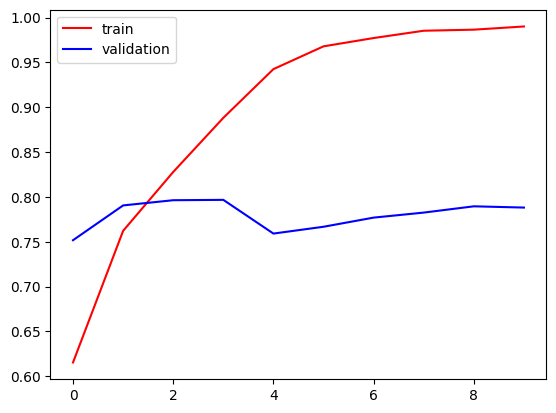

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()

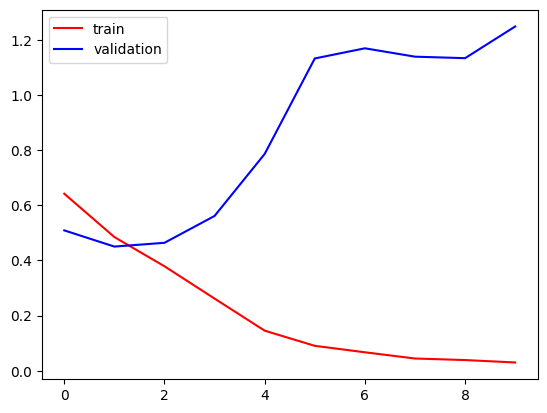

In [15]:
plt.plot(history.history['loss'],color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

In [19]:
import cv2

In [20]:
test_img = cv2.imread('/content/cat.jpeg')

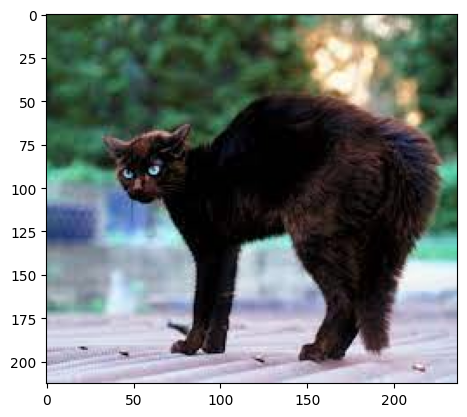

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(213, 237, 3)

In [23]:
test_img = cv2.resize(test_img,(256,256))

In [24]:
test_input = test_img.reshape((1,256,256,3))

In [25]:
model.predict(test_input)

1/1 [==============================] - 0s 319ms/step


array([[0.9680704]], dtype=float32)